# MoodMorph Assessment Evaluation Analysis

Jonas de Araújo Luz Junior and
Maria Andréia Formico Rodrigues

PPGIA & Gira Lab, Universidade de Fortaleza (Unifor), 
Av. Washington Soares, 1321, Fortaleza, CE, Brazil, 60811-341.
___
# Objective Analysis Notebook

In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from local.db_manager import DBManager

## Source data

The source data is read from the `Assessment.sqlite` SQLite database, which contains the prepared work data.

In [2]:
db = DBManager('data/Assessment.sqlite')

df_work = db.load_dataframe('work')

display(f"Index of df_work: {df_work.index.name}")
display(f"Columns of df_work: {df_work.columns.tolist()}")
df_work.head(2)

'Index of df_work: id'

"Columns of df_work: ['character_id', 'model', 'emotion', 'level', 'date_time', 'duration', 'animation', 'input_tokens', 'output_tokens', 'total_tokens', 'character_family', 'character_name', 'character_letter', 'model_name', 'calculated_tokens', 'delta_tokens', 'percent_delta_tokens', 'emotion_count']"

,character_id,model,emotion,level,date_time,duration,animation,input_tokens,output_tokens,total_tokens,character_family,character_name,character_letter,model_name,calculated_tokens,delta_tokens,percent_delta_tokens,emotion_count
id,,,,,,,,,,,,,,,,,,
1,314290e3a591271bd6499ad68b008e29788a27a60bc344...,openai/gpt-4o,anger,M,2025-10-12 13:58:53,5.957047,"{\r\n ""timeline"": [\r\n {\r\n ""name"":...",14814,405,15219,G2M,Atticus,A,gpt-4o,15219,0,0.0,1
2,314290e3a591271bd6499ad68b008e29788a27a60bc344...,openai/gpt-4o,contempt,M,2025-10-12 13:59:29,3.803284,"{\r\n ""timeline"": [\r\n {\r\n ""name"":...",14815,159,14974,G2M,Atticus,A,gpt-4o,14974,0,0.0,1


# Data analysis

## Measures of central tendency 

### Medians

In [3]:
# Calculate median metrics grouped by emotion_count, model_name, emotion, and character_letter
#
df_median_metrics = df_work.groupby(
    ['emotion_count', 'model_name', 'emotion', 'character_letter'])[
    ['duration', 'input_tokens', 'output_tokens', 'total_tokens']
  ].median()

df_median_metrics

duration  \
emotion_count model_name       emotion                            character_letter              
1             gemini-2.5-flash anger                              A                 15.050049   
                                                                  M                 22.713867   
                               contempt                           A                 12.305176   
                                                                  M                 13.058350   
                               disgust                            A                 15.128662   
...                                                                                       ...   
3             grok-4-fast      anger and fear and contempt        M                 14.244141   
                               disgust and anger and contempt     A                 29.232422   
                                                                  M                 10.436523   
                               happiness and surprise and sadness A                 47.324219   
                                                                  M                 17.685547   

                                                                                    input_tokens  \
emotion_count model_name       emotion                            character_letter                 
1             gemini-2.5-flash anger                              A                      16717.0   
                                                                  M                      12981.0   
                               contempt                           A                      16718.0   
                                                                  M                      12982.0   
                               disgust                            A                      16718.0   
...                                                                                          ...   
3             grok-4-fast      anger and fear and contempt        M                      11323.0   
                               disgust and anger and contempt     A                      14778.0   
                                                                  M                      11324.0   
                               happiness and surprise and sadness A                      14778.0   
                                                                  M                      11324.0   

                                                                                    output_tokens  \
emotion_count model_name       emotion                            character_letter                  
1             gemini-2.5-flash anger                              A                        3410.0   
                                                                  M                        2982.0   
                               contempt                           A                        2492.0   
                                                                  M                        2157.0   
                               disgust                            A                        3334.0   
...                                                                                           ...   
3             grok-4-fast      anger and fear and contempt        M                         180.0   
                               disgust and anger and contempt     A                         273.0   
                                                                  M                         274.0   
                               happiness and surprise and sadness A                         277.0   
                                                                  M                         229.0   

                                                                                    total_tokens  
emotion_count model_name       emotion                            character_letter                
1         

In [4]:
# Save the dataframe to an Excel file
#  
df_median_metrics.to_excel('data/df_median_metrics.xlsx')

#### Medians boxplots

In [5]:
df_filter = df_work[df_work['emotion_count'] == 2]

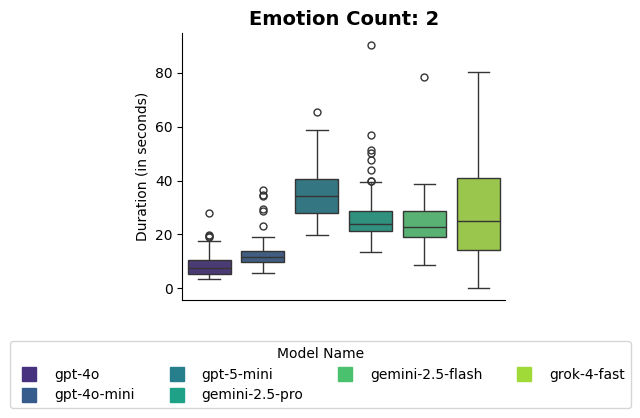

"Plot saved to 'duration_by_model_and_emotion_count.png'"

In [7]:
# 1) Fix the palette per model, to make it consistent.
models = df_filter['model_name'].unique()
palette_colors = sns.color_palette("viridis", n_colors=len(models))
palette = dict(zip(models, palette_colors))

# 2) Catplot without automatic label.
g = sns.catplot(
    data=df_filter,
    x='model_name', y='duration',
    col='emotion_count', col_wrap=1,
    kind='box',
    hue='model_name', palette=palette,
    height=4, aspect=1,
    legend=False
)

# Set axis labels, removing the x-axis label
g.set_axis_labels("", "Duration (in seconds)")

# 3) Remove x-axis tick labels.
for ax in g.axes.flat:
    ax.title.set_size(14)
    ax.title.set_weight('bold')
    ax.title.set_text(f"Emotion Count: {ax.get_title().split(' = ')[1]}")
    ax.set_xticklabels([])
    ax.tick_params(axis='x', length=0) # Optionally hide tick marks
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# 4) Global legend separated from the charts (below the grid).
handles = [plt.Line2D([], [], marker='s', linestyle='',
                      color=palette[m], label=m, markersize=10)
           for m in models]

g.figure.legend(
    handles=handles, title='Model Name',
    loc='lower center', ncol=min(4, len(models)),
    bbox_to_anchor=(0.5, -0.05)
)

# 5) Adjust layout to make space for the legend at the bottom
g.figure.tight_layout(rect=[0, 0.2, 1, 1])

# 6) Save the figure
output_filename = "duration_by_model_and_emotion_count.png"
g.savefig(output_filename)

plt.show()

display(f"Plot saved to '{output_filename}'")